# Clustering - Vacinados contra a Covid-19 em Recife 🦠

* Task:
A diretoria de comunicação da Secretaria de Saúde do Recife quer organizar uma campanha de comunicação acerca da vacinação contra COVID-19 via chatbot no whatsapp. Para isso o gestor da campanha necessita estratificar os grupos para personalizar as mensagens afim de aumentar o engajamento e efetividade da campanha.

Fonte de dados: 
http://dados.recife.pe.gov.br/dataset/7ccb3816-0d62-49e1-b39a-3159870883b0/resource/bceb5759-5500-49db-bc86-b038892acc06/download/vacinados.csv

## 1 - Importar dados

In [1]:
# Importar pacotes
import pandas as pd

In [2]:
# Carregar dataset
df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/7ccb3816-0d62-49e1-b39a-3159870883b0/resource/bceb5759-5500-49db-bc86-b038892acc06/download/vacinados.csv', sep=';', nrows=10000)

In [3]:
df.head(5)

,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,40 a 44 anos,42,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,210453,1 - CORONAVAC - SINOVAC (BUTANTAN),2.0,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-09-25 00:00:00.0
1,40 a 44 anos,42,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,210279,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-07-01 00:00:00.0
2,40 a 44 anos,42,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,210215,1 - CORONAVAC - SINOVAC (BUTANTAN),2.0,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-07-22 00:00:00.0
3,40 a 44 anos,41,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,211A21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),1.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-07-06 00:00:00.0
4,45 a 49 anos,47,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,EY0586,3 - COMIRNATY (PFIZER),1.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-07-12 00:00:00.0


## 2 - Análise Exploratória + Data Cleaning

In [4]:
# Inofrmações Gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   faixa_etaria       9998 non-null   object 
 1   idade              9999 non-null   object 
 2   sexo               10000 non-null  object 
 3   raca_cor           9999 non-null   object 
 4   municipio          9989 non-null   object 
 5   grupo              10000 non-null  object 
 6   categoria          7349 non-null   object 
 7   lote               9999 non-null   object 
 8   vacina_fabricante  9998 non-null   object 
 9   descricao_dose     9998 non-null   float64
 10  cnes               9998 non-null   object 
 11  sistema_origem     9998 non-null   object 
 12  data_vacinacao     9998 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1015.8+ KB


In [5]:
df['descricao_dose'] = df['descricao_dose'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   faixa_etaria       9998 non-null   object
 1   idade              9999 non-null   object
 2   sexo               10000 non-null  object
 3   raca_cor           9999 non-null   object
 4   municipio          9989 non-null   object
 5   grupo              10000 non-null  object
 6   categoria          7349 non-null   object
 7   lote               9999 non-null   object
 8   vacina_fabricante  9998 non-null   object
 9   descricao_dose     10000 non-null  object
 10  cnes               9998 non-null   object
 11  sistema_origem     9998 non-null   object
 12  data_vacinacao     9998 non-null   object
dtypes: object(13)
memory usage: 1015.8+ KB


In [7]:
# Valores únicos dos data types object
df.select_dtypes('object').nunique()

faixa_etaria          19
idade                 88
sexo                   4
raca_cor               7
municipio             17
grupo                 20
categoria             79
lote                 128
vacina_fabricante      4
descricao_dose         4
cnes                   9
sistema_origem         1
data_vacinacao       398
dtype: int64

Variáveis de interesse:
- grupo
- faixa_etaria
- descricao_dose

In [8]:
# Explorar as possíveis categorias
df.grupo.value_counts()

PÚBLICO EM GERAL (18 a 59 anos)                                                    5057
IDOSOS                                                                             1695
TRABALHADORES DA SAÚDE                                                             1275
PESSOAS COM COMORBIDADES                                                            685
TRABALHADORES DA EDUCAÇÃO                                                           530
TRABALHADORES INDUSTRIAIS E BANCÁRIOS                                               263
OUTRAS PRIORIDADES                                                                  183
GESTANTES E PUÉRPERAS                                                               105
CAMINHONEIROS                                                                        95
TRABALHADORES DA LIMPEZA URBANA                                                      25
TRABALHADORES DE TRANSPORTE AÉREO                                                    17
TRABALHADORES PORTUÁRIOS        

In [9]:
# Criar filtro para linhas de info discordantes
filtro = df['grupo'] != '2021-02-08 00:00:00.0'

In [10]:
df = df[filtro]

In [11]:
df.grupo.value_counts()


PÚBLICO EM GERAL (18 a 59 anos)                                                    5057
IDOSOS                                                                             1695
TRABALHADORES DA SAÚDE                                                             1275
PESSOAS COM COMORBIDADES                                                            685
TRABALHADORES DA EDUCAÇÃO                                                           530
TRABALHADORES INDUSTRIAIS E BANCÁRIOS                                               263
OUTRAS PRIORIDADES                                                                  183
GESTANTES E PUÉRPERAS                                                               105
CAMINHONEIROS                                                                        95
TRABALHADORES DA LIMPEZA URBANA                                                      25
TRABALHADORES DE TRANSPORTE AÉREO                                                    17
TRABALHADORES PORTUÁRIOS        

In [12]:
df.descricao_dose.value_counts()

1.0    4989
2.0    4135
3.0     874
nan       1
Name: descricao_dose, dtype: int64

In [13]:
df.faixa_etaria.value_counts()

40 a 44 anos    4523
35 a 39 anos    1979
45 a 49 anos     569
30 a 34 anos     412
75 a 79 anos     301
50 a 54 anos     291
80 a 84 anos     283
60 a 64 anos     260
70 a 74 anos     255
65 a 69 anos     252
55 a 59 anos     250
25 a 29 anos     204
85 a 89 anos     187
90 a 94 anos     138
20 a 24 anos      44
95 a 99 anos      31
15 a 19 anos      13
10 a 14 anos       3
100 anos +         3
Name: faixa_etaria, dtype: int64

In [14]:
# Criar categoria de variável numérica com pd.cut()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   faixa_etaria       9998 non-null   object
 1   idade              9998 non-null   object
 2   sexo               9999 non-null   object
 3   raca_cor           9998 non-null   object
 4   municipio          9988 non-null   object
 5   grupo              9999 non-null   object
 6   categoria          7349 non-null   object
 7   lote               9999 non-null   object
 8   vacina_fabricante  9998 non-null   object
 9   descricao_dose     9999 non-null   object
 10  cnes               9998 non-null   object
 11  sistema_origem     9998 non-null   object
 12  data_vacinacao     9998 non-null   object
dtypes: object(13)
memory usage: 1.1+ MB


In [15]:
df['idade'] = df['idade'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   faixa_etaria       9998 non-null   object 
 1   idade              9998 non-null   float64
 2   sexo               9999 non-null   object 
 3   raca_cor           9998 non-null   object 
 4   municipio          9988 non-null   object 
 5   grupo              9999 non-null   object 
 6   categoria          7349 non-null   object 
 7   lote               9999 non-null   object 
 8   vacina_fabricante  9998 non-null   object 
 9   descricao_dose     9999 non-null   object 
 10  cnes               9998 non-null   object 
 11  sistema_origem     9998 non-null   object 
 12  data_vacinacao     9998 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
df.idade.describe()

count    9998.000000
mean       46.741748
std        14.737004
min        13.000000
25%        39.000000
50%        41.000000
75%        46.000000
max       101.000000
Name: idade, dtype: float64

In [18]:
df['cat_idade'] = pd.cut(df.idade, [13,18,35,60,101], labels=['adolescente','adulto_jovem','adulto','idoso'])

In [19]:
df.sample(5)

,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao,cat_idade
6550,35 a 39 anos,39.0,MASCULINO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,218VCD254W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),2.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-10-01 00:00:00.0,adulto
8787,40 a 44 anos,41.0,MASCULINO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,215VCD174Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),1.0,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-07-04 00:00:00.0,adulto
2029,35 a 39 anos,37.0,FEMININO,PRETA,RECIFE,GESTANTES E PUÉRPERAS,GRÁVIDAS,31045BD,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-09-17 00:00:00.0,adulto
2070,40 a 44 anos,40.0,MASCULINO,AMARELA,RECIFE,TRABALHADORES DE TRANSPORTE AÉREO,OUTROS,FF8843,3 - COMIRNATY (PFIZER),2.0,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-09-18 00:00:00.0,adulto
7783,40 a 44 anos,43.0,MASCULINO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,210A21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-06-27 00:00:00.0,adulto


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   faixa_etaria       9998 non-null   object  
 1   idade              9998 non-null   float64 
 2   sexo               9999 non-null   object  
 3   raca_cor           9998 non-null   object  
 4   municipio          9988 non-null   object  
 5   grupo              9999 non-null   object  
 6   categoria          7349 non-null   object  
 7   lote               9999 non-null   object  
 8   vacina_fabricante  9998 non-null   object  
 9   descricao_dose     9999 non-null   object  
 10  cnes               9998 non-null   object  
 11  sistema_origem     9998 non-null   object  
 12  data_vacinacao     9998 non-null   object  
 13  cat_idade          9997 non-null   category
dtypes: category(1), float64(1), object(12)
memory usage: 1.1+ MB


In [21]:
df['cat_idade_str'] = df['cat_idade'].astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   faixa_etaria       9998 non-null   object  
 1   idade              9998 non-null   float64 
 2   sexo               9999 non-null   object  
 3   raca_cor           9998 non-null   object  
 4   municipio          9988 non-null   object  
 5   grupo              9999 non-null   object  
 6   categoria          7349 non-null   object  
 7   lote               9999 non-null   object  
 8   vacina_fabricante  9998 non-null   object  
 9   descricao_dose     9999 non-null   object  
 10  cnes               9998 non-null   object  
 11  sistema_origem     9998 non-null   object  
 12  data_vacinacao     9998 non-null   object  
 13  cat_idade          9997 non-null   category
 14  cat_idade_str      9999 non-null   object  
dtypes: category(1), float64(1), object(13)
memory usage: 1.

## 3 - Definir dataset categórico

In [23]:
# Encontrar colunas
df.columns

Index(['faixa_etaria', 'idade', 'sexo', 'raca_cor', 'municipio', 'grupo',
       'categoria', 'lote', 'vacina_fabricante', 'descricao_dose', 'cnes',
       'sistema_origem', 'data_vacinacao', 'cat_idade', 'cat_idade_str'],
      dtype='object')

In [24]:
df_cat = df[['grupo',
       'descricao_dose',
      'cat_idade_str']]

## 4 - Calculando o valor ótimo de K

In [25]:
# importanto as Libs 
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# optimal K
data = df_cat
data = data.fillna('')
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = 'random', n_init = 5, verbose=1) # parâmetros kmodes
    # n_clusters = range K
    # init = método de início de escolha de centróide
    # n_init = quantidade de vezes que o algotirmo roda
    # verbose = resposta pós inicialização
    kmode.fit_predict(data)
    # fit_predict = testar e ajustar o modelo
    cost.append(kmode.cost_)
    # cost_ = dissimilaridades

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 12428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 12428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 12428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 12428.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 399, cost: 8293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10733.0
Init: initializing centroids
Init: initializing clusters
Starting iteratio

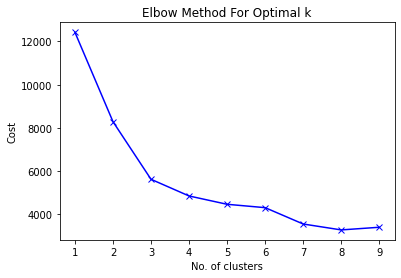

In [28]:
# Visualizando o optimal K
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## 5 - Clustering

In [29]:
# Gerando array de clusters para k = 4
kmode = KModes(n_clusters= 4, init = 'random', n_init = 5, verbose=1) # parâmetros kmodes
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1044, cost: 6827.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 399, cost: 7505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 371, cost: 7281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1039, cost: 4986.0
Run 4, iteration: 2/100, moves: 3, cost: 4986.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 487, cost: 4967.0
Best run was number 5


array([2, 3, 2, ..., 3, 2, 3], dtype=uint16)

## 6 - Inserir array no dataset

In [31]:
# Insert array no dataset
df_cat.insert(0, 'cluster', clusters)
df_cat.sample(5)

,cluster,grupo,descricao_dose,cat_idade_str
48,1,IDOSOS,1.0,idoso
5878,3,PÚBLICO EM GERAL (18 a 59 anos),1.0,adulto
4704,1,IDOSOS,3.0,idoso
6349,1,IDOSOS,1.0,idoso
2474,3,PÚBLICO EM GERAL (18 a 59 anos),1.0,adulto


## 7 - Explorar os clusters

In [32]:
# Contar valores normalizados
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cluster         9999 non-null   uint16
 1   grupo           9999 non-null   object
 2   descricao_dose  9999 non-null   object
 3   cat_idade_str   9999 non-null   object
dtypes: object(3), uint16(1)
memory usage: 332.0+ KB


In [35]:
df_cat.cluster.value_counts(normalize=True)*100

3    37.063706
2    30.103010
1    17.801780
0    15.031503
Name: cluster, dtype: float64

In [38]:
# Filtrar clusters
cluster3 = df_cat.loc[df_cat.cluster == 3]

In [39]:
# Describe all
cluster3.describe(include='all')

,cluster,grupo,descricao_dose,cat_idade_str
count,3706.0,3706,3706,3706
unique,NaN,16,1,2
top,NaN,PÚBLICO EM GERAL (18 a 59 anos),1.0,adulto
freq,NaN,2811,3706,3445
mean,3.0,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN
min,3.0,NaN,NaN,NaN
25%,3.0,NaN,NaN,NaN
50%,3.0,NaN,NaN,NaN
75%,3.0,NaN,NaN,NaN


In [42]:
cluster0 = df_cat.loc[df_cat.cluster == 0]

In [43]:
cluster0.describe(include='all')

,cluster,grupo,descricao_dose,cat_idade_str
count,1503.0,1503,1503,1503
unique,NaN,11,3,4
top,NaN,TRABALHADORES DA SAÚDE,3.0,adulto
freq,NaN,1272,515,1329
mean,0.0,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN
min,0.0,NaN,NaN,NaN
25%,0.0,NaN,NaN,NaN
50%,0.0,NaN,NaN,NaN
75%,0.0,NaN,NaN,NaN
